<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Cryptographie_Tables_de_Hachage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tables de Hachage**

Dans ce chapitre, nous allons découvrir les **fonctions de hachage cryptographique**. Ces fonctions permettent de générer une **empreinte numérique** servant à identifier rapidement une **donnée initiale**.

La donnée initiale peut être de tout type, comme du texte par exemple, et peut être très volumineuse (un livre, un film, ...).

L'empreinte numérique répond à plusieurs propriétés :
*   Elle est **déterministe** : La donnée initiale donnera toujours la même empreinte numérique
*   Elle est **calculée facilement** : Idéalement en un seul parcours de la donnée initiale
*   Elle est **à sens unique** : Il est impossible de retrouver la donnée initiale à partir de l'empreinte numérique
*   Elle est **résistante à la collision** : Deux empreintes numériques ne peuvent être obtenues à partir de deux données initiales différentes
*   Elle doit créer un **effet avalanche** : Une petite modification de la donné initiale entraine une empreinte numérique complétement différente

Prenons l'exemple de SHA-256 qui est un fonction de hachage beaucoup utilisée aujourd'hui, en particulier dans la gestion de la BlockChain et le minage de BitCoin.

Commençons par importer le module nécessaire.

In [21]:
import hashlib

En cas d'erreur sur ce bloc d'instructions, lancez l'installation du module hashlib, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [35]:
import sys  
!{sys.executable} -m pip install --user hashlib

Réalisons maintenant le hachage d'un texte avec la fonction SHA-256 :

In [23]:
m = hashlib.sha256()
m.update(b'Camarade')
print(m.hexdigest())

b7d4e76a230a2383657622f6bb486688f956b485b65ee23af305e42d4d627d8d


Observons l'**effet d'avalanche** :

In [24]:
m = hashlib.sha256()
m.update(b'Kamarade')
print(m.hexdigest())

9b8753c509d0b9695d306a68bc94db3728c277b2e82ac09c3150c35d22548f4e


SHA-256 est **déterministe** :

In [25]:
m = hashlib.sha256()
m.update(b'Camarade')
print(m.hexdigest())

b7d4e76a230a2383657622f6bb486688f956b485b65ee23af305e42d4d627d8d


En pratique, les fonctions de hachage permettent de construire des tables de hachage. Ces tables permettent d'accéder **rapidement** à la donnée.

Illustrons les problèmes pouvant être liés à l'accès aux données en créant une liste et en cherchant si une valeur est présente dans cette liste.

In [26]:
l = list(range(100))
'x' in l

False

Pour savoir si la valeur 'x' est présente dans l, on doit comparer la valeur 'x' à chaque élément de notre liste. Ici, l est une liste composée de valeurs numériques, et ne contient donc pas la lettre 'x'.

In [27]:
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Affichons le temps d'exécution de cette recherche :

In [28]:
%timeit 'x' in l

1000000 loops, best of 5: 1.28 µs per loop


In [29]:
l=range(100_000)
%timeit('x' in l)

100 loops, best of 5: 2.84 ms per loop


La durée de la recherche augmente proportionnellement au nombre d'éléments présents dans la liste.

En python, nous disposons nativement du type de donnée **Dictionnaire** qui est une table de hachage. Cette structure de donnée permet de réaliser des recherches plus rapidement.

La fonction de hachage permet d'affecter un indice à la donnée initiale :

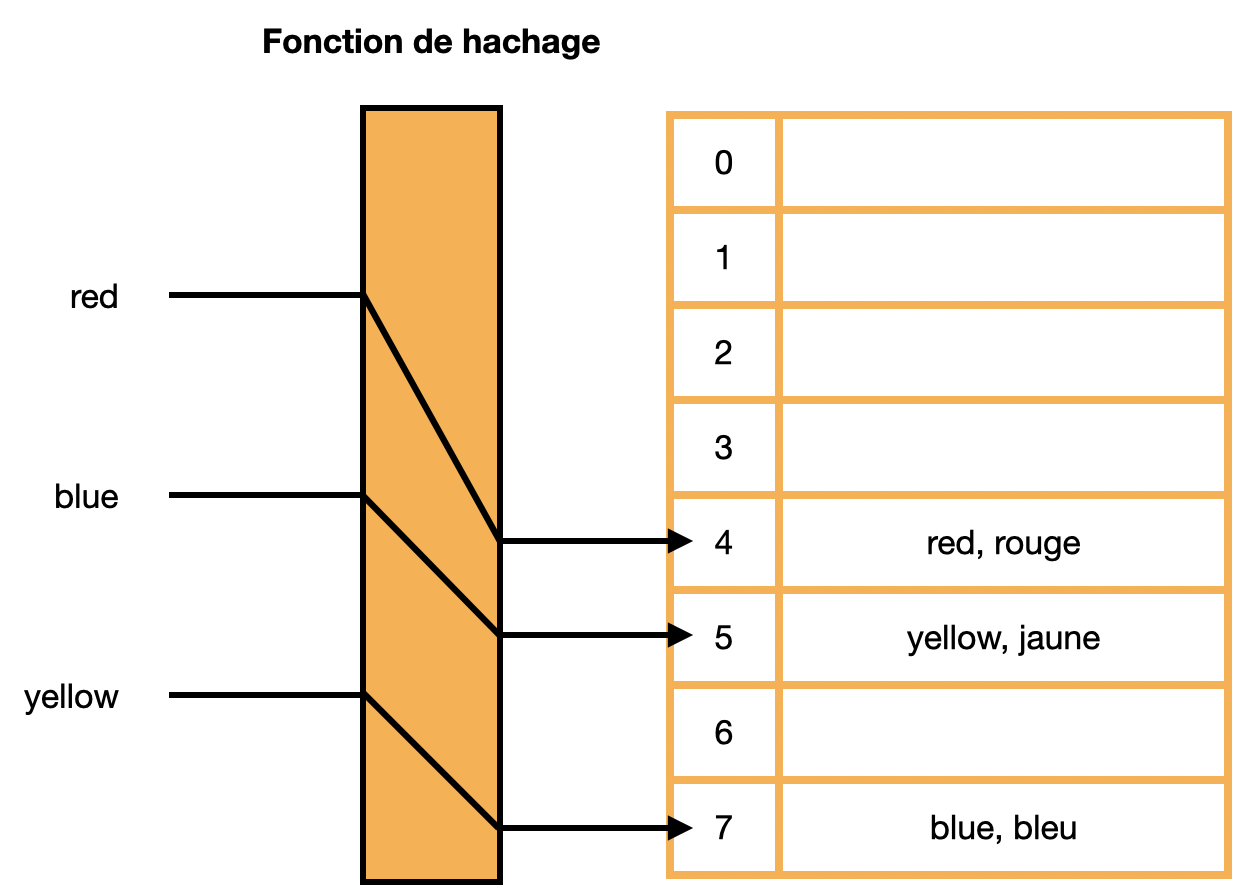

Une valeur peut ensuite être  associée à chaque clé (ici, la traduction en Français de la donnée initiale).

Prenons un exemple de fonction de hachage très simple, qui est la fonction utilisée dans la figure ci-dessus.

Convertissons notre donnée initiale en un entier. Chaque lettre est associée à une valeur entière comprise entre 0 et 255 (code ASCII). Nous pouvons représenter un mot par :

a0X^d + a1X^d−1 + ... + ad−1X + ad

avec X = 256, et a0, a1, . . . ad sont les entiers correspondant aux lettres du mot à convertir.

Pour le mot 'blue', cela donne :

In [30]:
print(ord('b'))
print(ord('l'))
print(ord('u'))
print(ord('e'))

98
108
117
101


In [31]:
print(98*256**3+108*256**2+117*256+101)

1651275109


En généralisant, on obtient :

In [32]:
def str_to_int(x):
  '''
  Retourne la conversion en entier du mot x
  '''
  n=0
  for i in range (len(x)):
    n = n + ord(x[i]) * 256 ** (len(x)-i-1)
  return n

In [33]:
print(str_to_int('blue'))

1651275109


Afin d'obtenir une clé dans notre dictionnaire, il faut appliquer un modulo de la taille du dictionnaire à ce noombre (ici : 8).

In [34]:
def hachage(x):
  return str_to_int(x)%8

print(hachage('red'))
print(hachage('blue'))
print(hachage('yellow'))

4
5
7


Voici donc comment nous obtenons les indices à partir des clés et de la fonction de chachage.

Remarquons que plusieurs clés peuvent donner le même indice :

In [35]:
print(hachage('blue'))
print(hachage('purple'))

5
5


Notons d'abord que cette fonction de hachage est **à sens unique**. Il est impossible de retrouver la donnée initiale à partir de la valeur obtennue.

Dans ce cas, nous obtenons 2 clés-valeurs associées à un même indice :

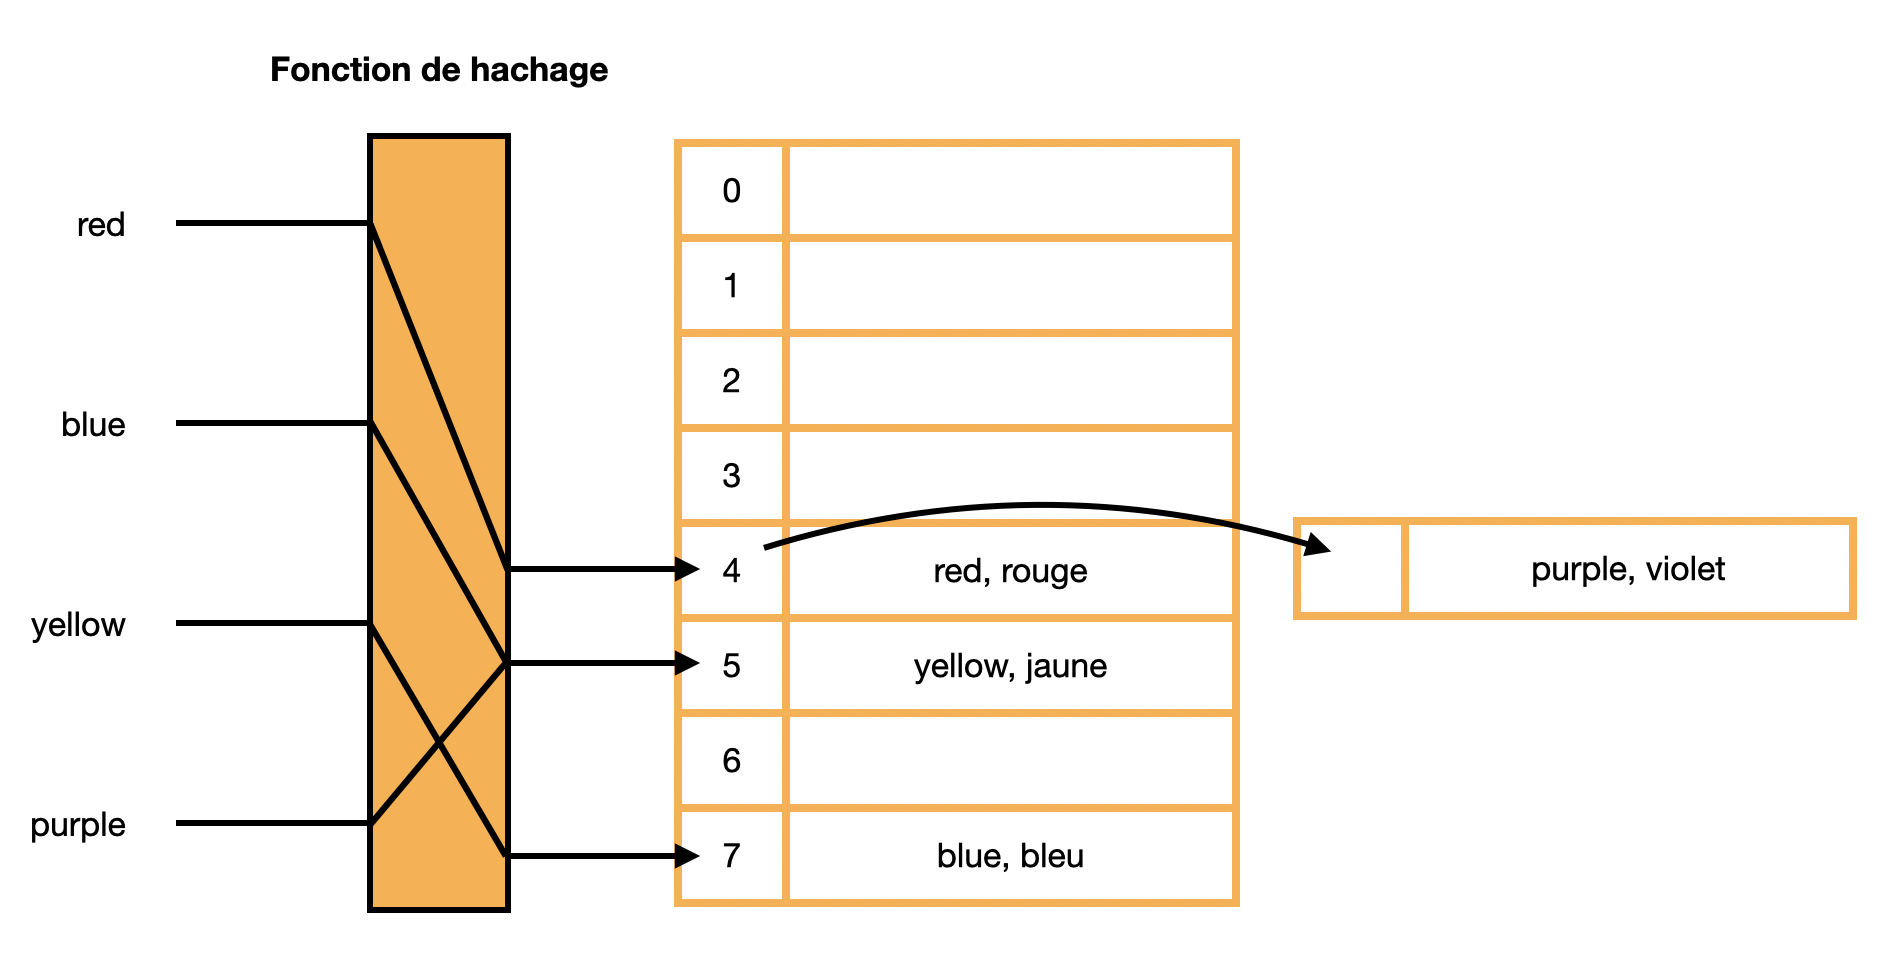

On appelle cela une **collision**. Dans ce cas, on emploie une méthode de résolution des collisions : soit on crée une liste des clés/valeurs associées à un même indice, soit on place les clés/valeurs en collision dans une alvéole libre.

Téhoriquement, les fonctions de hachage cryptographique doivent être **résistantes aux collisions** et cela ne doit pas se produire ou le plus rarement possible.

Enfin, pour que l'utilisation d'une table de hachage soit efficace pour diminuer le temps d'accès à la donnée, il faut que le résultat de la fonction de hachage soit **calculé facilement**. Le nombre d'opérations à réaliser doit être inférieur au nombre d'indices à partourir si on réalise une recherche standard.